# Data visualizaations

## Seaborn with heatmaps

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
olympics_df = pd.read_csv('../olympics.csv', skiprows=4)
olympics_df

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver
...,...,...,...,...,...,...,...,...,...,...
29211,Beijing,2008,Wrestling,Wrestling Gre-R,"ENGLICH, Mirko",GER,Men,84 - 96kg,M,Silver
29212,Beijing,2008,Wrestling,Wrestling Gre-R,"MIZGAITIS, Mindaugas",LTU,Men,96 - 120kg,M,Bronze
29213,Beijing,2008,Wrestling,Wrestling Gre-R,"PATRIKEEV, Yuri",ARM,Men,96 - 120kg,M,Bronze
29214,Beijing,2008,Wrestling,Wrestling Gre-R,"LOPEZ, Mijain",CUB,Men,96 - 120kg,M,Gold


### Using the Olympics dataset, present a summary of the total medals won by participating countries in the 2008 Olympics

In [7]:
olympics_2008 = olympics_df[olympics_df.Edition == 2008]
olympics_2008

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
27174,Beijing,2008,Aquatics,Diving,"GALPERIN, Gleb",RUS,Men,10m platform,M,Bronze
27175,Beijing,2008,Aquatics,Diving,"MITCHAM, Matthew",AUS,Men,10m platform,M,Gold
27176,Beijing,2008,Aquatics,Diving,"ZHOU, Luxin",CHN,Men,10m platform,M,Silver
27177,Beijing,2008,Aquatics,Diving,"WANG, Xin",CHN,Women,10m platform,W,Bronze
27178,Beijing,2008,Aquatics,Diving,"CHEN, Ruolin",CHN,Women,10m platform,W,Gold
...,...,...,...,...,...,...,...,...,...,...
29211,Beijing,2008,Wrestling,Wrestling Gre-R,"ENGLICH, Mirko",GER,Men,84 - 96kg,M,Silver
29212,Beijing,2008,Wrestling,Wrestling Gre-R,"MIZGAITIS, Mindaugas",LTU,Men,96 - 120kg,M,Bronze
29213,Beijing,2008,Wrestling,Wrestling Gre-R,"PATRIKEEV, Yuri",ARM,Men,96 - 120kg,M,Bronze
29214,Beijing,2008,Wrestling,Wrestling Gre-R,"LOPEZ, Mijain",CUB,Men,96 - 120kg,M,Gold


In [9]:
olympics_2008.groupby(['NOC', 'Medal']).size()

NOC  Medal 
AFG  Bronze     1
ALG  Bronze     1
     Silver     1
ARG  Bronze    31
     Gold      20
               ..
UZB  Silver     2
VEN  Bronze     1
VIE  Silver     1
ZIM  Gold       1
     Silver     3
Length: 188, dtype: int64

In [10]:
olympics_2008.groupby(['NOC', 'Medal']).size().unstack('Medal', fill_value=0)

Medal,Bronze,Gold,Silver
NOC,,,
AFG,1,0,0
ALG,1,0,1
ARG,31,20,0
ARM,6,0,0
AUS,76,31,42
...,...,...,...
USA,81,125,109
UZB,3,1,2
VEN,1,0,0


In [15]:
group_df = olympics_2008.groupby(['NOC', 'Medal']).size().unstack('Medal', fill_value=0)[['Gold', 'Silver', 'Bronze']]
group_df = group_df.sort_values(['Gold', 'Silver', 'Bronze'], ascending=False)
group_df

Medal,Gold,Silver,Bronze
NOC,,,
USA,125,109,81
CHN,74,53,57
RUS,43,44,56
GER,42,16,43
KOR,41,11,26
...,...,...,...
ISR,0,0,1
MDA,0,0,1
MRI,0,0,1


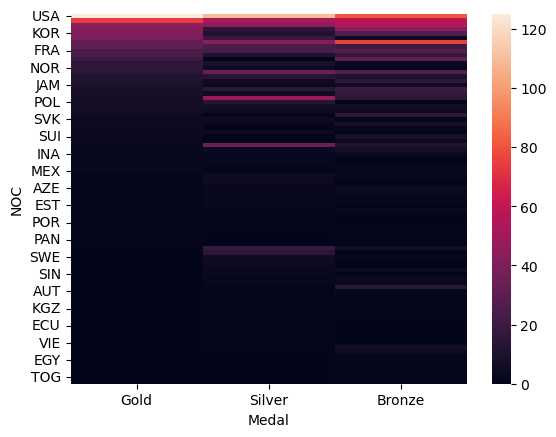

In [16]:
sns.heatmap(group_df);

In [17]:
group_df = group_df.transpose()
group_df

NOC,USA,CHN,RUS,GER,KOR,NED,AUS,GBR,FRA,JPN,...,VIE,ARM,TPE,AFG,EGY,ISR,MDA,MRI,TOG,VEN
Medal,,,,,,,,,,,,,,,,,,,,,
Gold,125,74,43,42,41,40,31,31,25,23,...,0,0,0,0,0,0,0,0,0,0
Silver,109,53,44,16,11,18,42,25,23,11,...,1,0,0,0,0,0,0,0,0,0
Bronze,81,57,56,43,26,4,76,21,28,17,...,0,6,4,1,1,1,1,1,1,1


<Axes: xlabel='NOC', ylabel='Medal'>

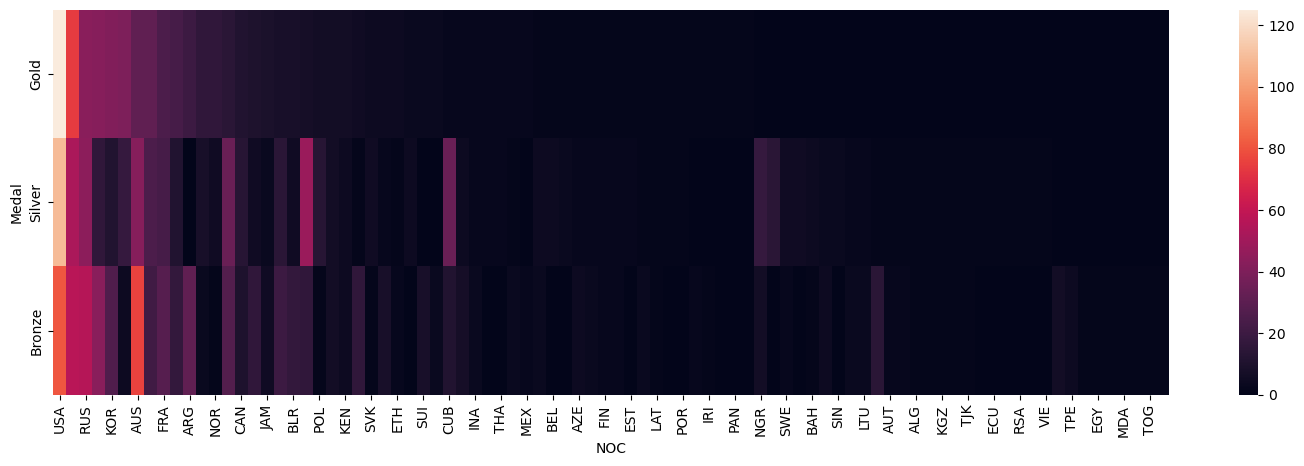

In [20]:
plt.figure(figsize=(18,5))
sns.heatmap(group_df)